# Detecting Heart Arrythmia 
### Methods: Principal Component Analysis 

In [14]:
import pandas as pd
import numpy as np
pd.options.display.max_rows = 500
pd.options.display.max_columns = 100

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.decomposition import PCA


In [2]:
data = pd.read_csv('arrhythmia_data.csv', header=None)
# display(data.shape)

### Data Pre-Processing
* Selecting only the first 27 features as they are of interest
* Dropping the gender feature, as that is binary and can modify our model in an inncorrect way

In [3]:
new_df = data[data!= '?']
data = new_df.dropna()

In [4]:
Y = data[data.columns[27]]
X = data[data.columns[0:26]]

In [5]:
# Drop Gender 
X = X.drop([1], axis=1)

# Drop P Wave, as there are not enough data points
X = X.drop([13], axis=1)

# Replace any value for arrythmia that isnt 0 with 1
Y[Y != 0] = 1

/Users/aditya/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/aditya/miniconda3/lib/python3.6/site-packages/pandas/core/generic.py:5984: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/aditya/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2910: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


[]

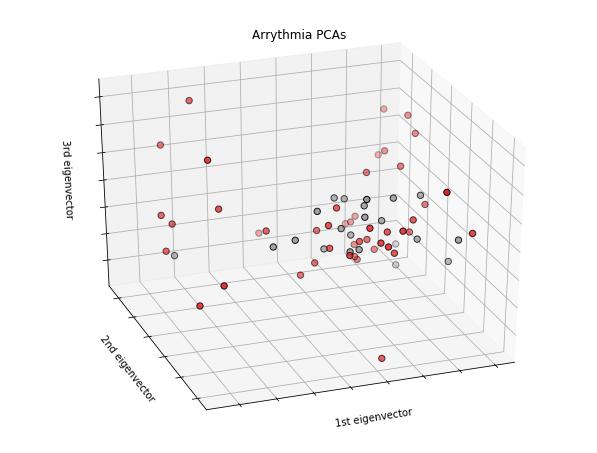

In [16]:
fig = plt.figure(1, figsize=(8,6)) 
ax = Axes3D(fig, elev=-150, azim=110)
X_red = PCA(n_components=3).fit_transform(X)

ax.scatter(X_red[:,0], X_red[:, 1], X_red[:, 2], c=Y, 
          cmap=plt.cm.Set1, edgecolor='k', s=40)

ax.set_title("Arrythmia PCAs")
ax.set_xlabel("1st Eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd Eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd Eigenvector")
ax.w_zaxis.set_ticklabels([])